<a href="https://colab.research.google.com/github/Kishorevanga/EDA-/blob/main/BIKE_RENTAL_PROJECT_(1)_(2)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv(r"bike_rent (1)  (1).csv")

# Display the first few rows of the dataset
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [2]:
numerical_columns = ['yr','mnth','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
categorical_columns = ['season','holiday','workingday','weathersit']

In [3]:
# Assuming 'df' is the original DataFrame containing your data
# First, replace '?' with NaN in both numerical and categorical columns
df[categorical_columns] = df[categorical_columns].replace('?', np.nan)
df[numerical_columns] = df[numerical_columns].replace('?', np.nan)

In [4]:
# 1. Describe the dataset

print("Dataset Information:\n")
df.info()
print("\nFirst 5 rows of the dataset:\n")
print(df.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17373 non-null  object
 3   yr          17378 non-null  object
 4   mnth        17378 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17378 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17374 non-null  object
 9   weathersit  17375 non-null  object
 10  temp        17368 non-null  object
 11  atemp       17373 non-null  object
 12  hum         17373 non-null  object
 13  windspeed   17374 non-null  object
 14  casual      17378 non-null  object
 15  registered  17378 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB

First 5 rows of the dataset:

   instant      dteday    s

In [5]:
# Convert columns with numerical data stored as objects
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
# 2. Clean the data
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64


In [7]:
# Check for duplicated records
duplicated_records = df.duplicated().sum()
print("\nDuplicated Records:")
print(duplicated_records)


Duplicated Records:
0


In [8]:
# Imputation for numerical columns with mean and categorical columns with mode
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [9]:
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [10]:
# Detect outliers using Z-scores (threshold: |z| > 3)
z_scores = df[numerical_columns].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("\nOutliers per column:")
print(outliers)


Outliers per column:
yr              0
mnth            0
temp            0
atemp           1
hum            22
windspeed     107
casual        467
registered    371
dtype: int64


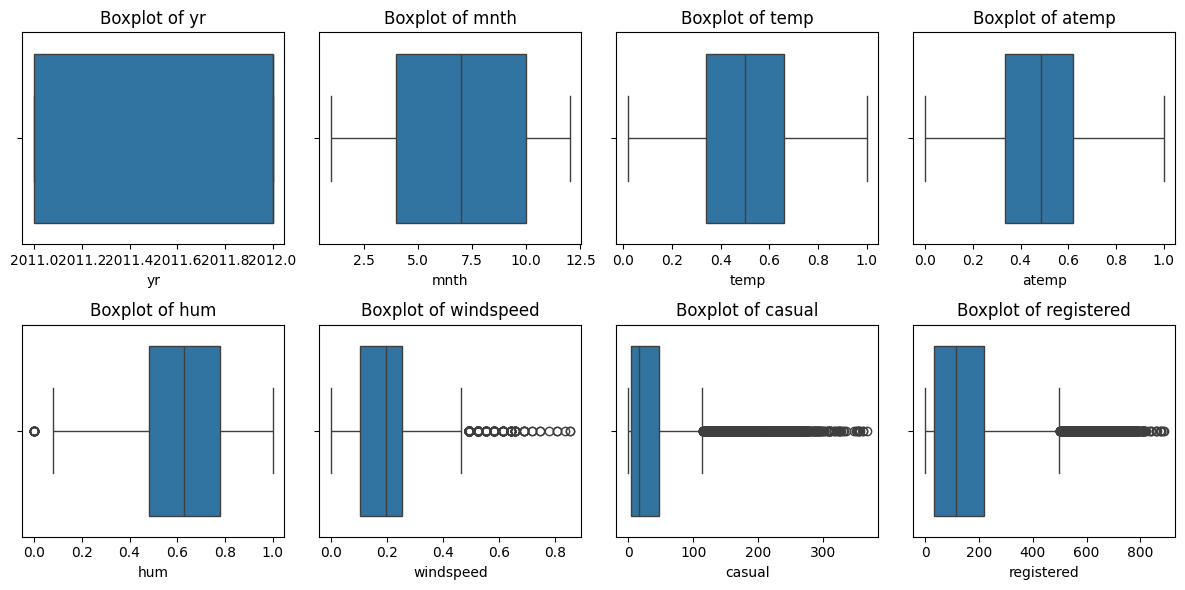

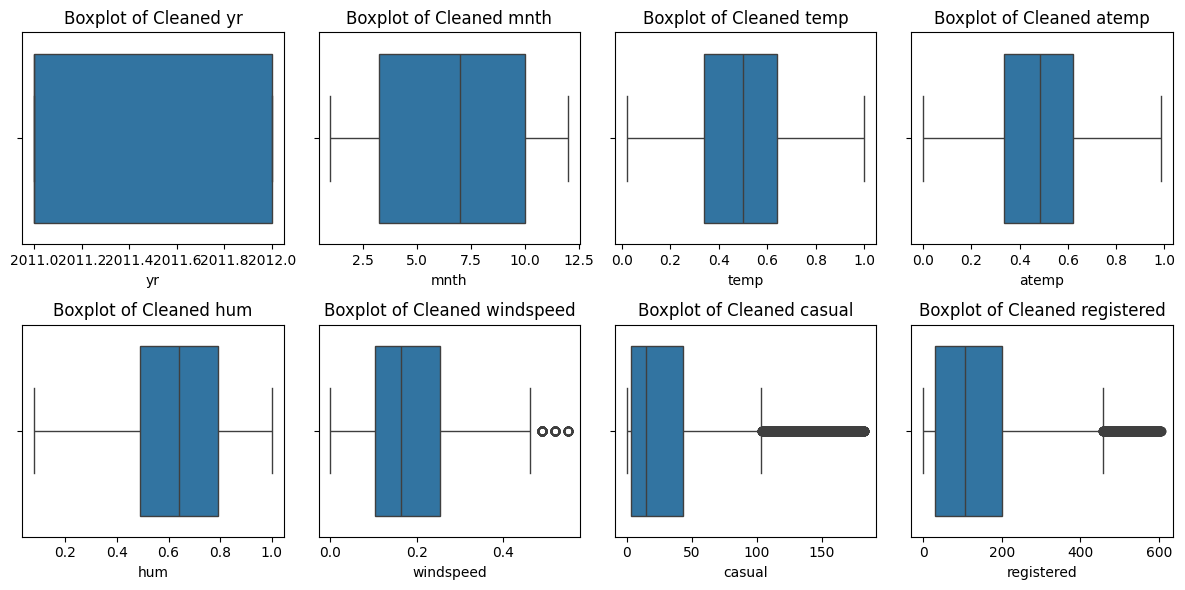

In [11]:
# Z-score calculation for detecting outliers in numerical columns
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Set a threshold to identify outliers (Z-score > 3)
outliers = (z_scores > 3).any(axis=1)

# Create a new DataFrame by removing outliers
cleaned_df = df[~outliers]

# Plotting Boxplots for numerical columns to detect outliers visually
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Plot boxplots for the cleaned data
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=cleaned_df, x=col)
    plt.title(f'Boxplot of Cleaned {col}')
plt.tight_layout()
plt.show()

In [12]:
# Optionally, save cleaned data to a new CSV file
# Save the cleaned dataset
cleaned_file_path = (r"C:\Users\Nayan\Desktop\bike rental d\cleaned bike_rent (3).csv")
df.to_csv(cleaned_file_path, index=False)

print(f"cleaned dataset saved to: {cleaned_file_path}")

cleaned dataset saved to: C:\Users\Nayan\Desktop\bike rental d\cleaned bike_rent (3).csv


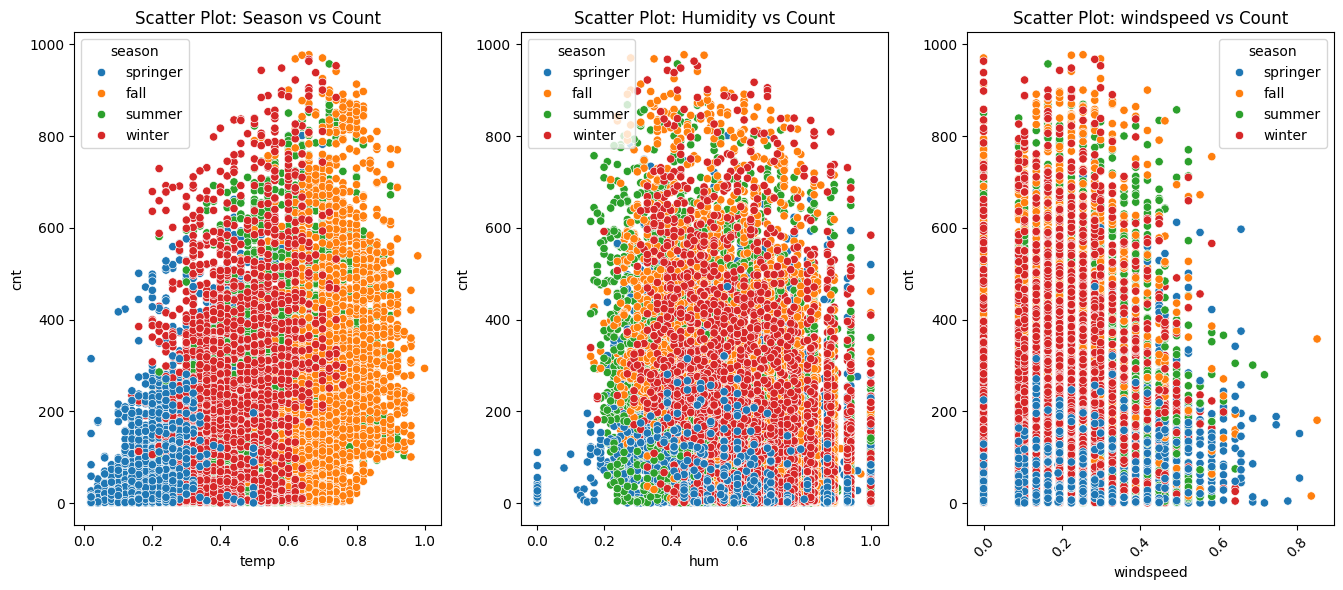

In [13]:
plt.figure(figsize=(18, 6))

# Plot for each category: season, holiday, weather, weekday

# 1st subplot: Season vs Count
plt.subplot(1, 4, 1)
sns.scatterplot(data=df, x='temp', y='cnt', hue='season')
plt.title('Scatter Plot: Season vs Count')


# 2nd subplot: Holiday vs Count
plt.subplot(1, 4, 2)
sns.scatterplot(data=df, x='hum', y='cnt', hue='season')
plt.title('Scatter Plot: Humidity vs Count')

# 3rd subplot: Weather vs Count
plt.subplot(1, 4, 3)
sns.scatterplot(data=df, x='windspeed', y='cnt', hue='season')
plt.title('Scatter Plot: windspeed vs Count')
plt.xticks(rotation=45)


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

<ipython-input-14-c4f56cff9b30>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weekday', y='cnt', ci=None)


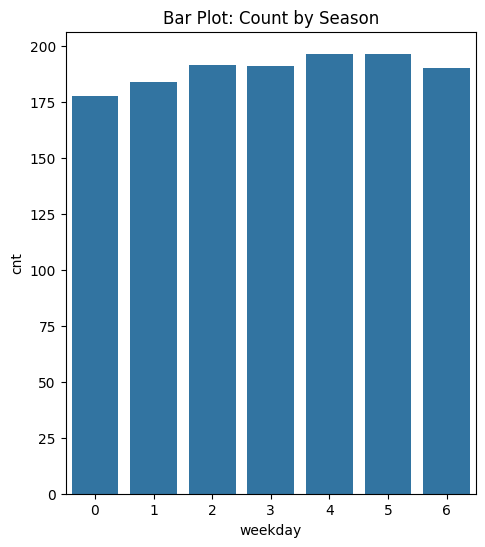

<ipython-input-14-c4f56cff9b30>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='workingday', y='cnt', ci=None)


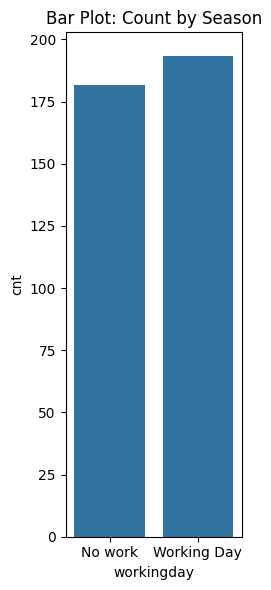

<ipython-input-14-c4f56cff9b30>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weathersit', y='cnt', ci=None)


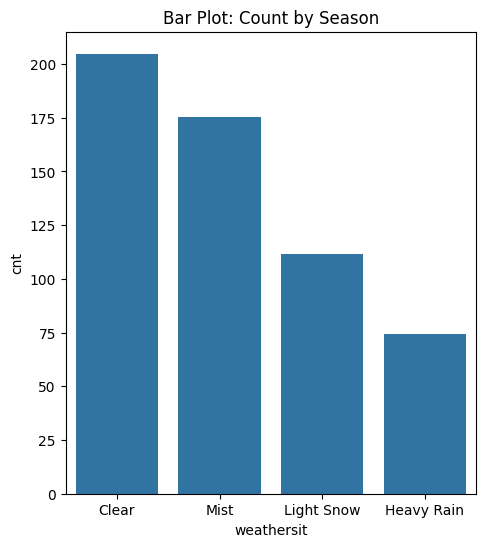

In [14]:
# BAR PLOTS:

plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='weekday', y='cnt', ci=None)
plt.title('Bar Plot: Count by Season')
plt.show()

plt.figure(figsize=(7,6))
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='workingday', y='cnt', ci=None)
plt.title('Bar Plot: Count by Season')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18,6))
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='weathersit', y='cnt', ci=None)
plt.title('Bar Plot: Count by Season')
plt.show()

<ipython-input-15-ae183cfef65f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hr', y='cnt', hue='weekday', ci=None)


Text(0.5, 1.0, 'Line Plot: Hourly Count by Weekday')

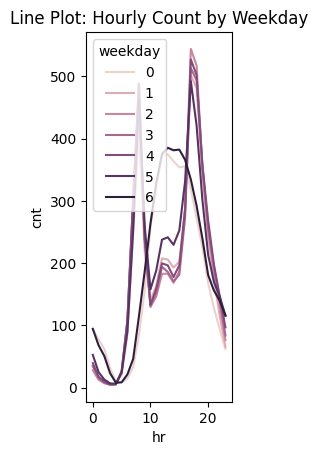

In [15]:
# LINE PLOTS:

plt.subplot(1, 3, 2)
sns.lineplot(data=df, x='hr', y='cnt', hue='weekday', ci=None)
plt.title('Line Plot: Hourly Count by Weekday')

<ipython-input-16-4472818c9ea8>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_data = df.resample('M').sum()


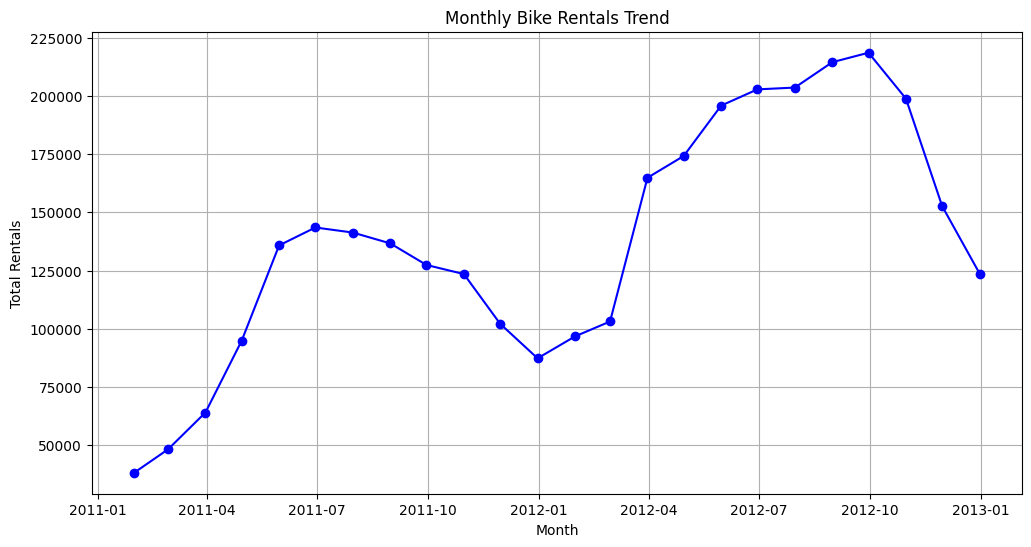

In [16]:
# 2. Time series analysis:

import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'dteday' column is parsed as datetime
# Handle potential format issues
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True, errors='coerce')

# Check for any invalid datetime parsing
if df['dteday'].isnull().sum() > 0:
    print("Warning: Some dates could not be parsed. Review the 'dteday' column for inconsistencies.")
    df = df.dropna(subset=['dteday'])

# Set 'dteday' as index
df.set_index('dteday', inplace=True)

# Resample to monthly data and aggregate the counts
time_series_data = df.resample('M').sum()

# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['cnt'], marker='o', linestyle='-', color='b')
plt.title('Monthly Bike Rentals Trend')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()


Numerical columns used for correlation:
Index(['instant', 'yr', 'mnth', 'hr', 'weekday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


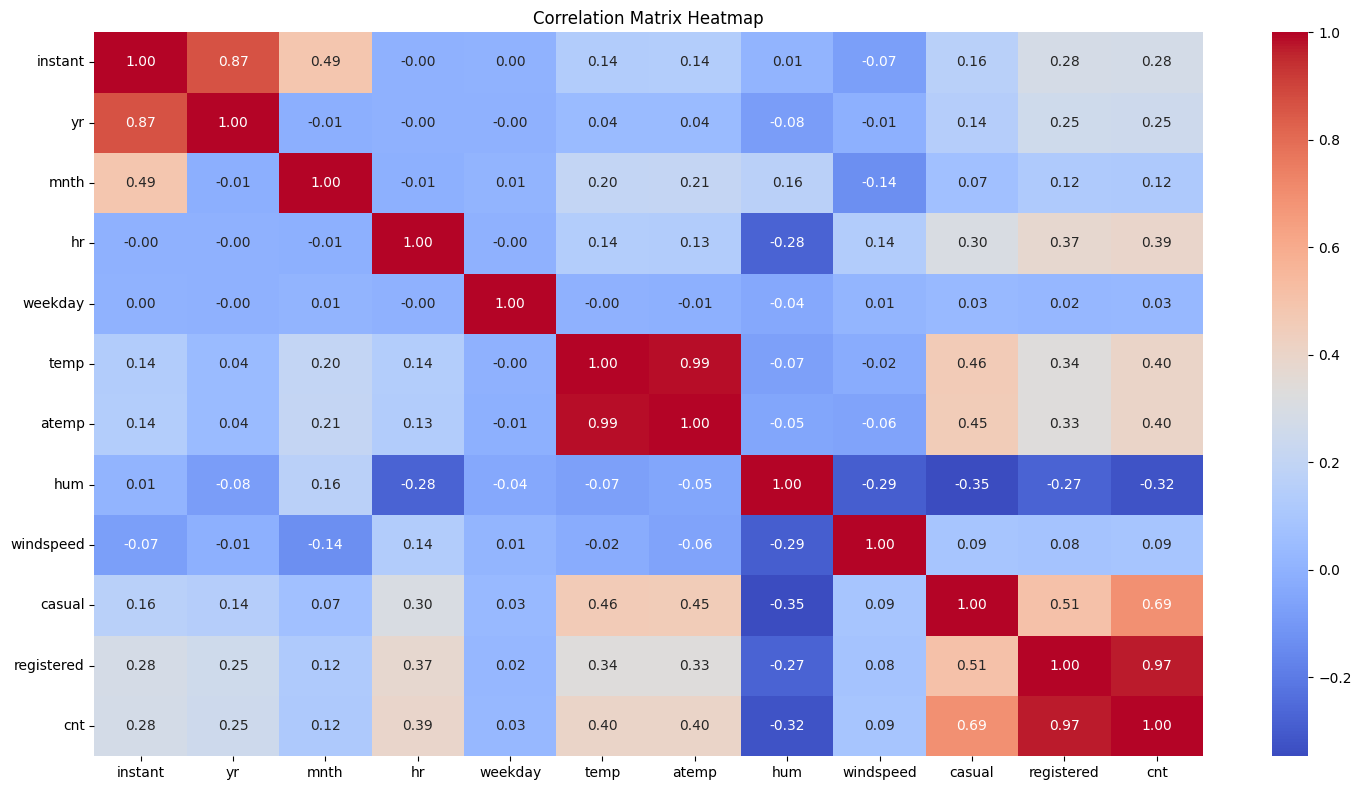

In [17]:
# 3. Heatmap of correlation matrix:

# Check for numerical columns
print("Numerical columns used for correlation:")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

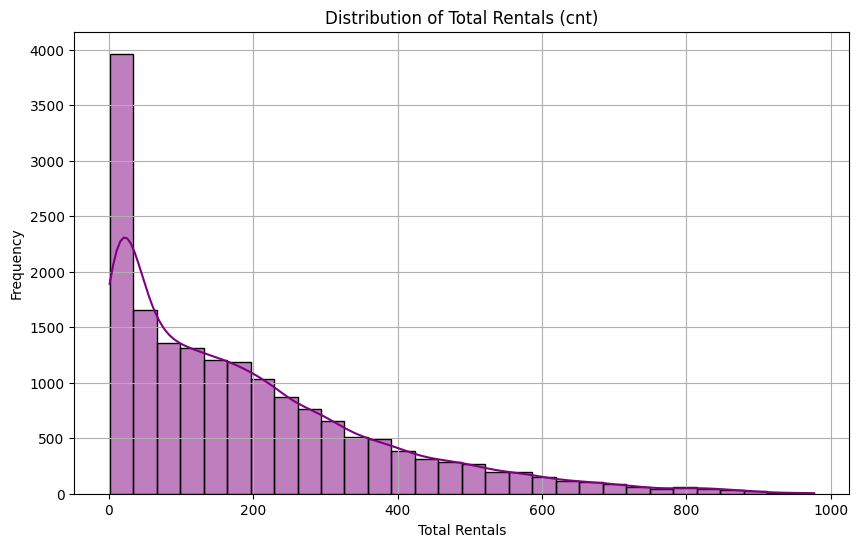

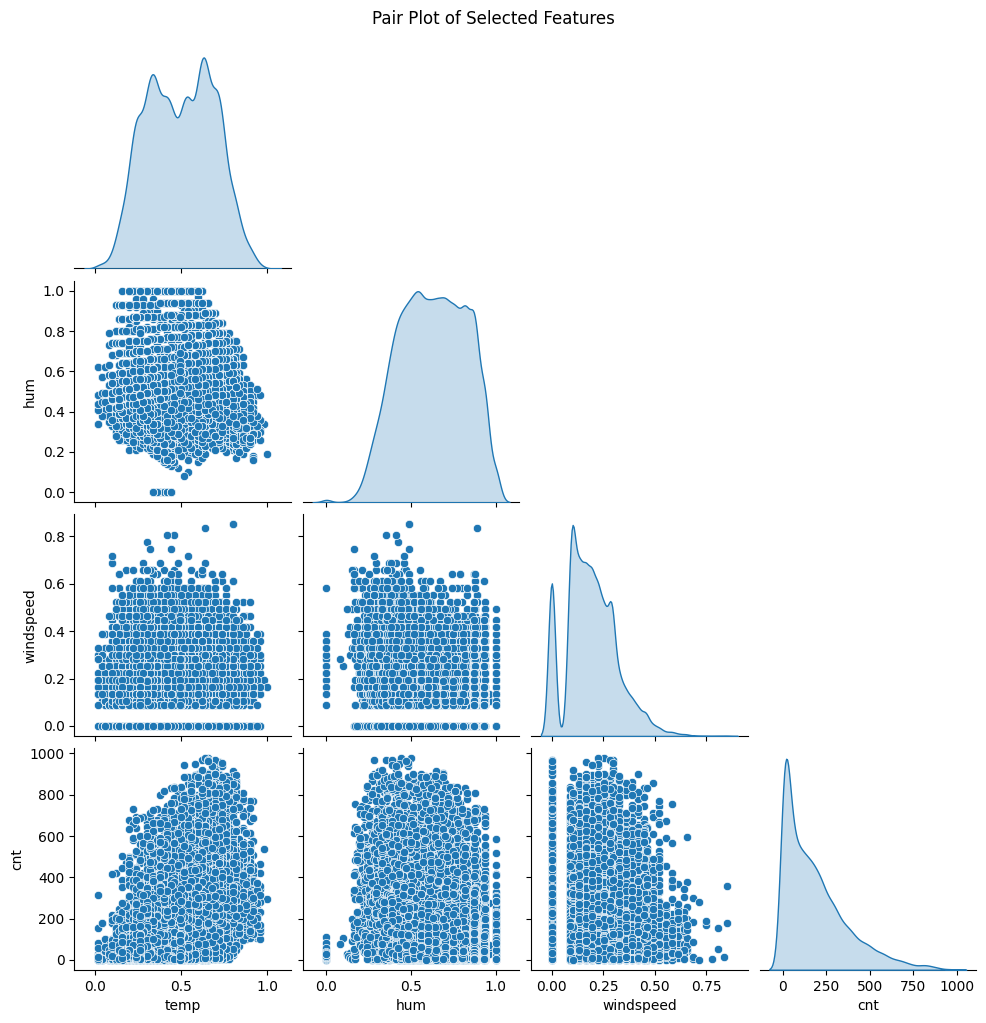

<ipython-input-18-b748ac1964f6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='cnt', palette='Set2')


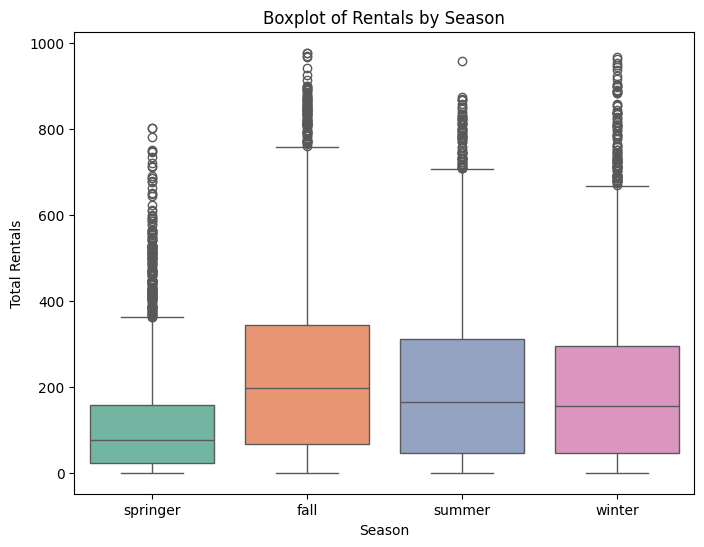

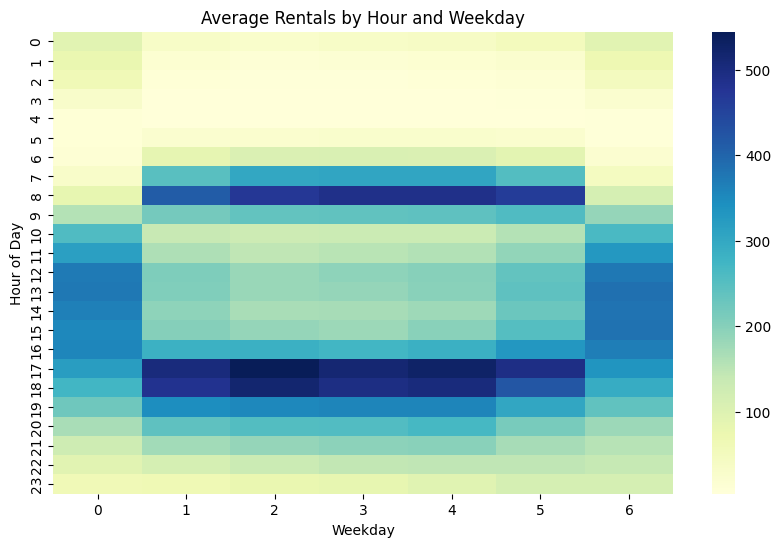

In [18]:
# 4. Additional Informative Plots

# 1. Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, bins=30, color='purple')
plt.title('Distribution of Total Rentals (cnt)')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Pair Plot
selected_columns = ['temp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df[selected_columns], diag_kind='kde', kind='scatter', corner=True)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# 3. Seasonal Trends - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='season', y='cnt', palette='Set2')
plt.title('Boxplot of Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

# 4. Hourly Heatmap
# Create a pivot table for heatmap
hourly_pivot = df.pivot_table(index='hr', columns='weekday', values='cnt', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_pivot, annot=False, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title('Average Rentals by Hour and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour of Day')
plt.show()


3. FEATURE ENGINEERING

In [19]:
# 1. Generate new features

# Ensure 'temp' column is numeric and missing values are handled
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['temp_squared'] = df['temp'].fillna(0) ** 2

# Compute the interaction term, ensuring numeric columns
df['humidity_windspeed_interaction'] = (
    pd.to_numeric(df['hum'], errors='coerce').fillna(0) *
    pd.to_numeric(df['windspeed'], errors='coerce').fillna(0)
)

print("New features added successfully.")
print(df[['temp_squared', 'humidity_windspeed_interaction']].head())

New features added successfully.
            temp_squared  humidity_windspeed_interaction
dteday                                                  
2011-01-01        0.0576                             0.0
2011-01-01        0.0484                             0.0
2011-01-01        0.0484                             0.0
2011-01-01        0.0576                             0.0
2011-01-01        0.0576                             0.0


In [20]:
# 2. Handle categorical variables

categorical_columns = ['season', 'weekday', 'weathersit']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]),
                                   columns=encoder.get_feature_names_out(categorical_columns),
                                   index=df.index)
df = pd.concat([df, categorical_encoded], axis=1)
df.drop(columns=categorical_columns, inplace=True)

In [21]:
# 3. Scale numerical features

# Convert all scaled columns to numeric (will set invalid values to NaN)
scaled_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'temp_squared', 'humidity_windspeed_interaction']
df[scaled_columns] = df[scaled_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values (e.g., fill with median or drop rows)
df.dropna(subset=scaled_columns, inplace=True)  # Dropping rows with NaN in scaled columns

# Scale numerical features
scaler = StandardScaler()
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Output the transformed DataFrame
print(df.head())

            instant      yr  mnth  hr holiday workingday      temp     atemp  \
dteday                                                                         
2011-01-01        1  2011.0   1.0   0      No    No work -1.336038 -1.094047   
2011-01-01        2  2011.0   1.0   1      No    No work -1.439956 -1.182525   
2011-01-01        3  2011.0   1.0   2      No    No work -1.439956 -1.182525   
2011-01-01        4  2011.0   1.0   3      No    No work -1.336038 -1.094047   
2011-01-01        5  2011.0   1.0   4      No    No work -1.336038 -1.094047   

                 hum  windspeed  ...  season_winter  weekday_1  weekday_2  \
dteday                           ...                                        
2011-01-01  0.947601  -1.554219  ...            0.0        0.0        0.0   
2011-01-01  0.895760  -1.554219  ...            0.0        0.0        0.0   
2011-01-01  0.000000  -1.554219  ...            0.0        0.0        0.0   
2011-01-01  0.636559  -1.554219  ...            0.0   

In [22]:
print(df.columns)


Index(['instant', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'temp_squared',
       'humidity_windspeed_interaction', 'season_springer', 'season_summer',
       'season_winter', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_Heavy Rain',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')


In [23]:
# Skip parsing 'dteday' if it's not present
# df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True, errors='coerce')
# if 'weekday' not in df.columns:
#     df['weekday'] = df['dteday'].dt.weekday  # Extract weekday from 'dteday'


In [24]:
print("Unique values in 'yr':", df['yr'].unique())
print("Unique values in 'mnth':", df['mnth'].unique())


Unique values in 'yr': [2011.         2011.50258948 2012.        ]
Unique values in 'mnth': [ 1.          2.          3.          4.          5.          6.
  7.          8.          9.         10.         11.         12.
  6.53746116]


In [25]:
# Ensure 'yr' contains only valid values
df = df[df['yr'].isin([0, 1])]

# Ensure 'mnth' is within 1-12
df = df[(df['mnth'] >= 1) & (df['mnth'] <= 12)]


In [26]:
# Create a 'dteday' column using 'yr' and 'mnth' (assuming day as 1)
df['dteday'] = pd.to_datetime({
    'year': 2000 + df['yr'],  # Assuming 'yr' is 0 for 2000 and 1 for 2001
    'month': df['mnth'],
    'day': 1  # Default to the first day of the month
})

# Generate 'weekday' from 'dteday'
df['weekday'] = df['dteday'].dt.weekday


In [27]:
print(df[['yr', 'mnth']].isnull().sum())


yr      0
mnth    0
dtype: int64


In [28]:
df['yr'] = df['yr'].fillna(0).astype(int)  # Default to 0 (year 2000)
df['mnth'] = df['mnth'].fillna(1).astype(int)  # Default to January


In [29]:
# Ensure 'dteday' is parsed as datetime
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True, errors='coerce')

# Generate the 'weekday' column if it doesn't exist
if 'weekday' not in df.columns:
    df['weekday'] = df['dteday'].dt.weekday  # Extract weekday from 'dteday'

# Ensure 'temp', 'hum', and 'windspeed' columns are numeric
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['hum'] = pd.to_numeric(df['hum'], errors='coerce')
df['windspeed'] = pd.to_numeric(df['windspeed'], errors='coerce')

# 1. Peak Hour Indicator
df['is_peak_hour'] = df['hr'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)

# 2. Weekend Indicator
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

# 3. Temperature Range Categories
def categorize_temperature(temp):
    if pd.isna(temp):
        return 'unknown'
    elif temp < 0.3:  # Assuming normalized temperatures
        return 'cold'
    elif 0.3 <= temp <= 0.6:
        return 'moderate'
    else:
        return 'hot'

df['temp_category'] = df['temp'].apply(categorize_temperature)

# 4. Daytime/Nighttime Indicator
df['is_daytime'] = df['hr'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# 5. Comfort Level (based on humidity and windspeed)
def comfort_level(hum, windspeed):
    if pd.isna(hum) or pd.isna(windspeed):
        return 'unknown'
    elif hum >= 0.7 and windspeed > 0.2:
        return 'uncomfortable'
    elif hum <= 0.7 and windspeed <= 0.2:
        return 'comfortable'
    else:
        return 'neutral'

df['comfort_level'] = df.apply(
    lambda row: comfort_level(row['hum'], row['windspeed']), axis=1
)

# Display the first few rows of the updated dataset with new features
print("New Domain-Knowledge-Based Features:")
print(df[['hr', 'weekday', 'is_peak_hour', 'is_weekend', 'temp_category', 'is_daytime', 'comfort_level']].head())



New Domain-Knowledge-Based Features:
Empty DataFrame
Columns: [hr, weekday, is_peak_hour, is_weekend, temp_category, is_daytime, comfort_level]
Index: []


In [31]:
# Preprocessing
# Handle missing or invalid values
# Ensure 'data' is defined before preprocessing

data = pd.read_csv(r"cleaned bike_rent.csv")
data.dropna(inplace=True)


In [32]:
# Convert appropriate columns to numeric

data['temp'] = pd.to_numeric(data['temp'], errors='coerce')
data['atemp'] = pd.to_numeric(data['atemp'], errors='coerce')
data['hum'] = pd.to_numeric(data['hum'], errors='coerce')
data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce')

In [33]:
# Encode categorical variables

data = pd.get_dummies(data, columns=['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit'])

In [34]:
# Feature selection

x = data.drop(columns=['cnt', 'instant', 'dteday', 'casual', 'registered'])
y = data['cnt']

In [35]:
# 2. Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
#Random forest

In [37]:
# Initialize modeL
rand_for=RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_leaf=3,min_samples_split=5,random_state=100,bootstrap=False)
rand_model=rand_for.fit(x_train,y_train)
#RMSE,MAE or R-Squared
y_pred_rand=rand_model.predict(x_test)
rms_rand=np.sqrt(mean_squared_error(y_test,y_pred_rand))
print("RMSE:",rms_rand)
mae_rand=mean_absolute_error(y_test,y_pred_rand)
print("MAE:",mae_rand)
r2_rand=r2_score(y_test,y_pred_rand)
print("R:",r2_rand)


RMSE: 105.55473132573958
MAE: 70.21612329870447
R: 0.6481396945435731


In [38]:
#Training the model
#using grid search to find best parameters
params_rand={'n_estimators':range(50,100),'bootstrap':[True,False]}
grid_sch_rand=GridSearchCV(rand_for,params_rand,verbose=2)


In [39]:
grid_sch_rand.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ....................bootstrap=True, n_estimators=50; total time=   0.8s
[CV] END ....................bootstrap=True, n_estimators=50; total time=   0.8s
[CV] END ....................bootstrap=True, n_estimators=50; total time=   0.8s
[CV] END ....................bootstrap=True, n_estimators=50; total time=   1.0s
[CV] END ....................bootstrap=True, n_estimators=50; total time=   1.2s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   1.2s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.9s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.8s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.8s
[CV] END ....................bootstrap=True, n_estimators=51; total time=   0.8s
[CV] END ....................bootstrap=True, n_estimators=52; total time=   0.8s
[CV] END ....................bootstrap=True, n

GridSearchCV(estimator=RandomForestRegressor(bootstrap=False, max_depth=5,
                                             min_samples_leaf=3,
                                             min_samples_split=5,
                                             random_state=100),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': range(50, 100)},
             verbose=2)

In [40]:
grid_sch_rand.best_params_

{'bootstrap': True, 'n_estimators': 87}

In [41]:
#building Random forest model with best params
rand_for2=RandomForestRegressor(n_estimators=93,max_depth=5,min_samples_leaf=3,min_samples_split=5,random_state=100,bootstrap=True)

In [42]:
rand_model2=rand_for2.fit(x_train,y_train)

In [43]:
#RMSE,MAE or R-Squared
y_pred_rand2=rand_model2.predict(x_test)
rms_rand2=np.sqrt(mean_squared_error(y_test,y_pred_rand2))
print("RMSE:",rms_rand2)
mae_rand2=mean_absolute_error(y_test,y_pred_rand2)
print("MAE:",mae_rand2)
r2_rand2=r2_score(y_test,y_pred_rand2)
print("R:",r2_rand2)

RMSE: 103.92405724403834
MAE: 68.50612164630344
R: 0.658927226325724


In [44]:
#DECISION TREE

In [45]:
#Training the model
dectree=DecisionTreeRegressor(max_depth=5,min_samples_leaf=3,min_samples_split=5,random_state=100)
dt_model=dectree.fit(x_train,y_train)

In [46]:
#RMSE,MAE or R-Squared
y_pred=dt_model.predict(x_test)
rms_dt=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rms_dt)
mae_dt=mean_absolute_error(y_test,y_pred)
print("MAE:",mae_dt)
r2_dt=r2_score(y_test,y_pred)
print("R:",r2_dt)

RMSE: 105.55366002148904
MAE: 70.20971211920539
R: 0.6481468367630305


In [47]:
import matplotlib.pyplot as plt

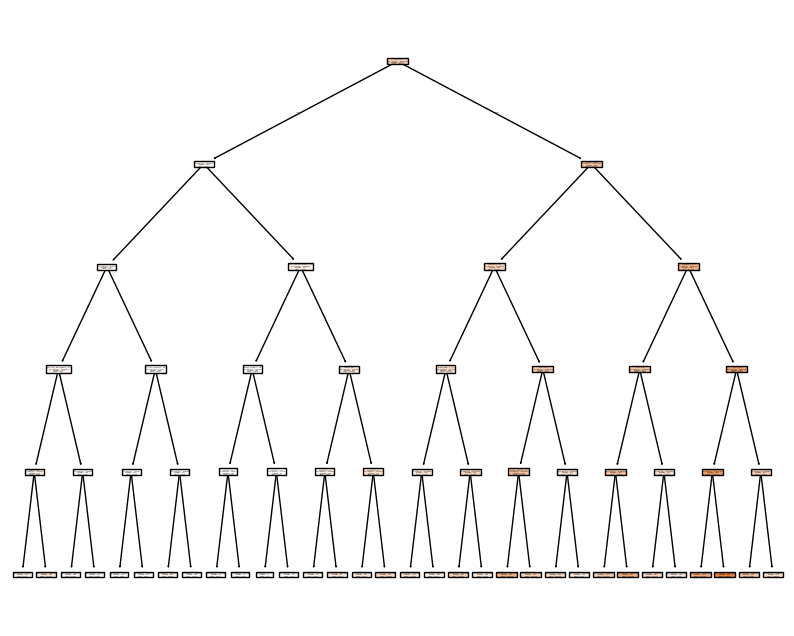

In [48]:
#plotting the decision Tree
plt.figure(figsize=(10,8))
plot_tree(dt_model,filled=True,feature_names=x_train.columns)
plt.show()

In [49]:
#finding the best parameter using grid search
params={'max_depth':range(2,10),'min_samples_split':range(2,10),'min_samples_leaf':range(2,10)}
grid=GridSearchCV(dectree,params,verbose=2)


In [50]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=5, min_samples_leaf=3,
                                             min_samples_split=5,
                                             random_state=100),
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=2)

In [51]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [52]:
#RMSE,MAE or R-Squared of best parameteres model
y_pred=dt_model.predict(x_test)
rms_dt=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rms_dt)
mae_dt=mean_absolute_error(y_test,y_pred)
print("MAE:",mae_dt)
r2_dt=r2_score(y_test,y_pred)
print("R:",r2_dt)

RMSE: 105.55366002148904
MAE: 70.20971211920539
R: 0.6481468367630305


In [53]:
gb_model=GradientBoostingRegressor(n_estimators=50,learning_rate=0.01,max_depth=5)

In [54]:
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50)

In [55]:
#RMSE,MAE or R-Squared
y_pred_gb=gb_model.predict(x_test)
rms_gb=np.sqrt(mean_squared_error(y_test,y_pred_gb))
print("RMSE:",rms_gb)
mae_gb=mean_absolute_error(y_test,y_pred_gb)
print("MAE:",mae_gb)
r2_gb=r2_score(y_test,y_pred_gb)
print("R:",r2_gb)

RMSE: 134.8746274776247
MAE: 102.9790334586527
R: 0.4255193799966731


In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
gb_param_grid={'n_estimators':[50,100,150,200,250,300],'learning_rate':[0.01,0.1,0.2],'max_depth':[3,5,7]}
gb_random_search=RandomizedSearchCV(estimator=gb_model,param_distributions=gb_param_grid,n_iter=10,cv=3,verbose=2)

In [58]:
gb_random_search.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.9s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.9s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   7.8s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   8.9s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=300; total time=   8.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=150; total time=   3.9s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=150; total time=   9.1s
[CV] END ...learning_rate=0.2, max_depth=7, n_es

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=5,
                                                       n_estimators=50),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   verbose=2)

In [59]:
gb_best_params=gb_random_search.best_params_
gb_best_score=gb_random_search.best_score_
print('gb_best_params=',gb_best_params)
print('gb_best_score=',gb_best_score)

gb_best_params= {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
gb_best_score= 0.9467195222553834


In [60]:
#building the model with best parameters
gb_model2=GradientBoostingRegressor(n_estimators=50,learning_rate=0.01,max_depth=5)
gb_model2.fit(x_train,y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50)

In [61]:
#RMSE,MAE or R-Squared  value of best params model
y_pred_gb2=gb_model2.predict(x_test)
rms_gb2=np.sqrt(mean_squared_error(y_test,y_pred_gb2))
print("RMSE:",rms_gb2)
mae_gb2=mean_absolute_error(y_test,y_pred_gb2)
print("MAE:",mae_gb2)
r2_gb2=r2_score(y_test,y_pred_gb2)
print("R:",r2_gb2)

RMSE: 134.8746675675954
MAE: 102.97952116113632
R: 0.42551903848077677


In [62]:
import pickle


In [63]:
pickle.dump(rand_model2,open('rand_model2.pkl','wb'))

In [64]:
import joblib

# Assuming 'rand_model2' is the trained RandomForestRegressor
joblib.dump(rand_model2, 'bike_rental_model.pkl')


['bike_rental_model.pkl']